In [1]:
# Importing the libraries
import numpy as np 
import pandas as pd


# scikit-learn modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Reading the data
# Reading the data
dataset = pd.read_csv("Dataset\\finnish.arff.csv")
x = np.array(dataset.drop(['Effort'],axis=1))
y = np.array(dataset['Effort'])

In [2]:
scaler=MinMaxScaler(feature_range=(0,1))
x=scaler.fit_transform(x)
y=np.reshape(y,(38,1))
y=scaler.fit_transform(y)

In [3]:
x_train_full, x_test, y_train_full, y_test = train_test_split(x, y, test_size = 0.2, random_state =67)

In [4]:
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.33, random_state=1)

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR



model1 = DecisionTreeRegressor()
model1.fit(x_train, y_train)
val_pred1=model1.predict(x_val)
test_pred1=model1.predict(x_test)
val_pred1=pd.DataFrame(val_pred1)
test_pred1=pd.DataFrame(test_pred1)

model2 = KNeighborsRegressor()
model2.fit(x_train,y_train)
val_pred2=model2.predict(x_val)
test_pred2=model2.predict(x_test)
val_pred2=pd.DataFrame(val_pred2)
test_pred2=pd.DataFrame(test_pred2)


model3 = SVR()
model3.fit(x_train,y_train)
val_pred3=model2.predict(x_val)
test_pred3=model2.predict(x_test)
val_pred3=pd.DataFrame(val_pred3)
test_pred3=pd.DataFrame(test_pred3)



# // Note: x_val is numpy array, not dataframe, so to use in concat, it must be converted to dataframe

df_val=pd.concat([pd.DataFrame(x_val), val_pred1,val_pred2,val_pred3],axis=1)
df_test=pd.concat([pd.DataFrame(x_test), test_pred1,test_pred2,test_pred3],axis=1)

model = DecisionTreeRegressor()
model.fit(df_val,y_val)  
# X_train,y_train
model.score(df_test,y_test)
# X_test,y_test

y_pred=model.predict(df_test)

# r2_score=1 - (1-model.score(df_val, y_val))*(len(y_val)-1)/(len(y_val)-df_val.shape[1]-1)
# print("\n Adj R2 score:\n",r2_score)

 # regressor.fit(x_train,y_train.ravel())
# x_train, y_train
# # Predicting the target values of the test set

# y_pred=regressor.predict(x_test)
# x_train

c:\Users\sachi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
# y_test
# y_pred

In [7]:
y_pred=np.reshape(y_pred,(8,1))
y_test=np.reshape(y_test,(8,1))

In [8]:
y_test

array([[0.21251431],
       [0.27001145],
       [0.        ],
       [0.04921786],
       [0.06791301],
       [0.0293781 ],
       [0.66074018],
       [0.29130103]])

In [9]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [10]:
def calculate_smape(actual, predicted) -> float:
  
    # Convert actual and predicted to numpy
    
    actual = np.array(actual)
    predicted = np.array(predicted)
  
    return round(
        np.mean(
            np.abs(predicted - actual) / 
            ((np.abs(predicted) + np.abs(actual))/2)
        )*100, 2
    )

In [11]:
# RMSE (Root Mean Square Error)
mse=mean_squared_error(y_test, y_pred)
print("\nMSE:\n",mse)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("\nRMSE:\n",rmse)
mape=mape(y_test, y_pred)
print("\nMAPE:\n",mape)

smape = calculate_smape(y_test, y_pred)
print("\nSMAPE:\n",smape)
r2_score=1 - (1-model.score(df_val, y_val))*(len(y_val)-1)/(len(y_val)-df_val.shape[1]-1)
print("\n Adj R2 score:\n",r2_score)


MSE:
 0.0471159597350138

RMSE:
 0.21706211031641104

MAPE:
 inf

SMAPE:
 93.87

 Adj R2 score:
 1.0


C:\Users\sachi\AppData\Local\Temp\ipykernel_7892\4261787059.py:3: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((actual - pred) / actual)) * 100


In [12]:
y_pred=scaler.inverse_transform(y_pred)

In [13]:
y_test=scaler.inverse_transform(y_test)

In [14]:
y_test=np.reshape(y_test,(8,))
y_pred=np.reshape(y_pred,(8,))

In [15]:
dfr=pd.DataFrame({'Actual Effort':y_test, 'Predicted Effort':y_pred})
print(dfr)

   Actual Effort  Predicted Effort
0         6030.0           17200.0
1         7537.0            4713.0
2          460.0            4713.0
3         1750.0            4500.0
4         2240.0            4713.0
5         1230.0            4500.0
6        17778.0           18690.0
7         8095.0           17200.0


In [16]:
    dfr.to_csv('Blendingfinish.csv', index=True)
   
    dfr.to_excel("Blendingfinsh.xlsx")
    
    

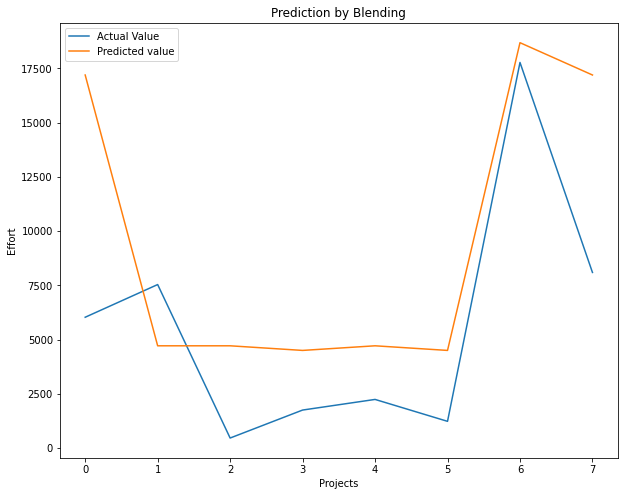

In [17]:
#Predicted vs Actual Close Value 
from matplotlib import pyplot as plt 
plt.figure(figsize=(10,8))
plt.plot(y_test, label="Actual Value")
plt.plot(y_pred, label="Predicted value")
plt.title("Prediction by Blending")
plt.xlabel("Projects")
plt.ylabel("Effort")
plt.legend()
plt.show()